### Model Building and saving the model using Pickle

 1. Import required libraries and read the dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import pickle


2. Check the first few samples, shape, info of the data and try to familiarize
yourself with different features.

In [2]:
# Assuming 'df' is the variable holding your dataset
df = pd.read_csv('loan_approval_data.csv')

# Display the first few rows, shape, and info
print(df.head())
print(df.shape)
print(df.info())


    loan_id gender married  dependents     education self_employed  \
0  lp001002   male      no         0.0      graduate            no   
1  lp001003   male     yes         1.0      graduate            no   
2  lp001005   male     yes         0.0      graduate           yes   
3  lp001006   male     yes         0.0  not graduate            no   
4  lp001008   male      no         0.0      graduate            no   

   applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   credit_history property_area loan_status  
0             1.0         urban           y  
1             1.0         rural           n  
2             

3. Check for missing values in the dataset, if present? handle them with
appropriate methods and drop redundant features.

In [3]:
print(df.isnull().sum())

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64


In [4]:
# Drop rows with any missing values
df.dropna(inplace=True)
# Drop columns with any missing values
df.dropna(axis=1, inplace=True)


In [5]:
print(df.isnull().sum())


loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64


In [6]:
print(df)

      loan_id  gender married  dependents     education self_employed  \
1    lp001003    male     yes         1.0      graduate            no   
2    lp001005    male     yes         0.0      graduate           yes   
3    lp001006    male     yes         0.0  not graduate            no   
4    lp001008    male      no         0.0      graduate            no   
5    lp001011    male     yes         2.0      graduate           yes   
..        ...     ...     ...         ...           ...           ...   
609  lp002978  female      no         0.0      graduate            no   
610  lp002979    male     yes         3.0      graduate            no   
611  lp002983    male     yes         1.0      graduate            no   
612  lp002984    male     yes         2.0      graduate            no   
613  lp002990  female      no         0.0      graduate           yes   

     applicantincome  coapplicantincome  loanamount  loan_amount_term  \
1               4583             1508.0       128.

In [7]:
redundant_columns = ['dependents']
df.drop(redundant_columns, axis=1, inplace=True)


In [8]:
print(df)

      loan_id  gender married     education self_employed  applicantincome  \
1    lp001003    male     yes      graduate            no             4583   
2    lp001005    male     yes      graduate           yes             3000   
3    lp001006    male     yes  not graduate            no             2583   
4    lp001008    male      no      graduate            no             6000   
5    lp001011    male     yes      graduate           yes             5417   
..        ...     ...     ...           ...           ...              ...   
609  lp002978  female      no      graduate            no             2900   
610  lp002979    male     yes      graduate            no             4106   
611  lp002983    male     yes      graduate            no             8072   
612  lp002984    male     yes      graduate            no             7583   
613  lp002990  female      no      graduate           yes             4583   

     coapplicantincome  loanamount  loan_amount_term  credit_hi

4. Visualize the distribution of the target column 'loan_status' with respect to
various categorical features and write your observations.

In [10]:
df.columns = df.columns.str.strip()


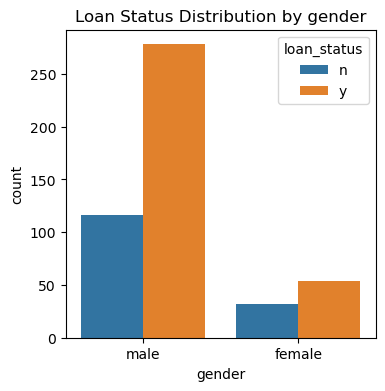

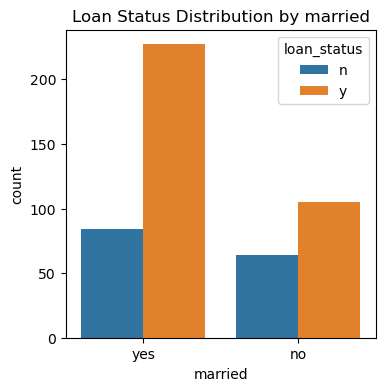

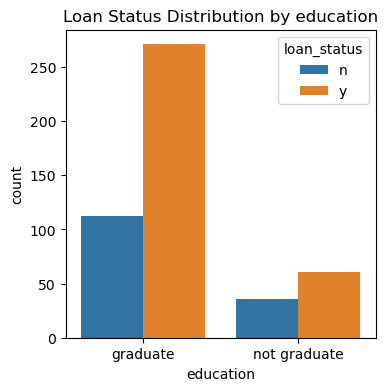

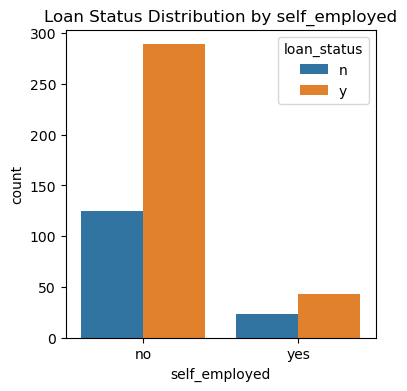

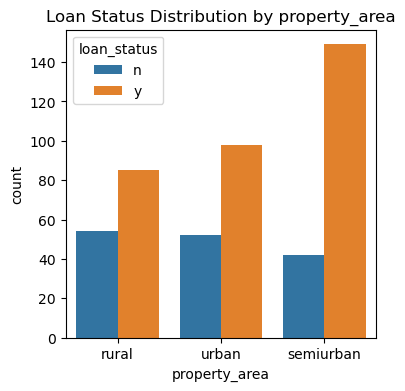

In [14]:
categorical_features = ['gender', 'married', 'education', 'self_employed', 'property_area']

for feature in categorical_features:
    plt.figure(figsize=(4, 4))
    sns.countplot(data=df, x=feature, hue='loan_status')
    plt.title(f'Loan Status Distribution by {feature}')
    plt.show()


* Gender:
The distribution of loan status between males and females shows that males have a higher number of both approved and rejected loans compared to females.
* Married:
Married applicants have a higher number of approved loans compared to single applicants. This could indicate that marital status plays a role in loan approval.
* Education:
Graduates have a higher number of approved loans compared to non-graduates. This might suggest that educational qualification influences loan approval.
* Self_Employed:
Self-employed individuals have fewer loans compared to salaried individuals. However, the approval rate among self-employed individuals is not significantly different from that of salaried individuals.
* Property_Area:
Urban and semi-urban areas have higher loan approvals compared to rural areas. This could indicate that applicants from urban areas are more likely to get loan approvals.

5. Encode the categorical data.

In [16]:
# Encode categorical data
cat_columns = ['gender', 'married', 'education', 'self_employed', 'property_area']
df_encoded = pd.get_dummies(df, columns=cat_columns, drop_first=True)


6. Separate the target and independent features and split the data into train
and test.

In [18]:
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


7. Build any classification model to predict the loan status of the customer
and save your model using pickle

In [ ]:
# Build the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model using Pickle
with open('loan_prediction_model.pkl', 'wb') as f:
    pickle.dump(model, f)
